# Transmission Data — ENTSO-E Examples

Querying cross-border flows and scheduled exchanges between countries.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. Physical Cross-Border Flows — France → Germany

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_fr_de = client.transmission.crossborder_flows(
    start, end, country_from="FR", country_to="DE_LU"
)
df_fr_de.head()

,timestamp,value,in_domain,out_domain,quantity_unit
0,2024-05-31 22:00:00+00:00,3052.0245,DE_LU,FR,MAW
1,2024-05-31 23:00:00+00:00,2930.1105,DE_LU,FR,MAW
2,2024-06-01 00:00:00+00:00,3042.2400,DE_LU,FR,MAW
3,2024-06-01 01:00:00+00:00,3145.8575,DE_LU,FR,MAW
4,2024-06-01 02:00:00+00:00,3121.1760,DE_LU,FR,MAW


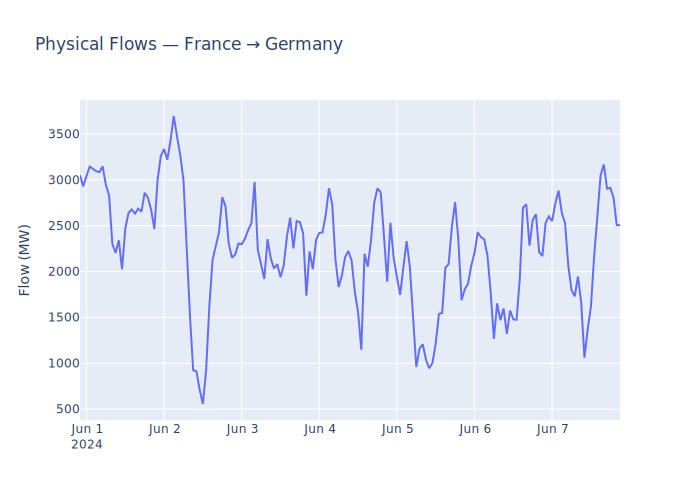

In [3]:
fig = px.line(
    df_fr_de, x="timestamp", y="value",
    title="Physical Flows — France → Germany",
    labels={"value": "Flow (MW)", "timestamp": ""},
)
fig.show()

## 2. Bidirectional Flows — France ↔ Germany

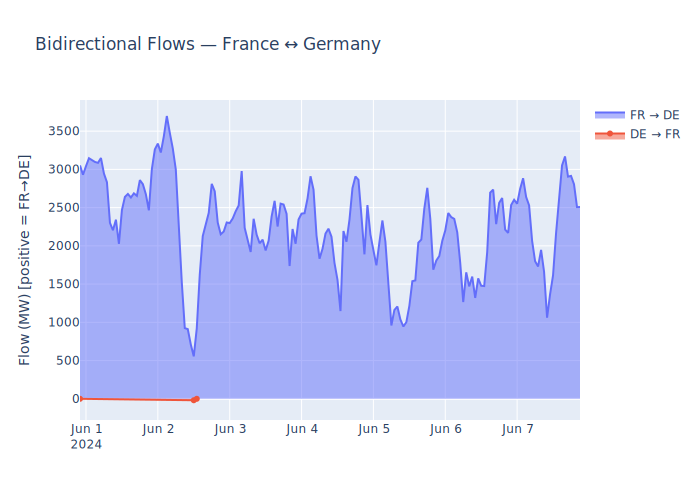

In [4]:
df_de_fr = client.transmission.crossborder_flows(
    start, end, country_from="DE_LU", country_to="FR"
)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_fr_de["timestamp"], y=df_fr_de["value"],
    name="FR → DE", fill="tozeroy", line=dict(color="#636EFA"),
))
fig.add_trace(go.Scatter(
    x=df_de_fr["timestamp"], y=-df_de_fr["value"],
    name="DE → FR", fill="tozeroy", line=dict(color="#EF553B"),
))
fig.update_layout(
    title="Bidirectional Flows — France ↔ Germany",
    yaxis_title="Flow (MW)  [positive = FR→DE]",
    xaxis_title="",
)
fig.show()

## 3. Scheduled Exchanges — France → Spain

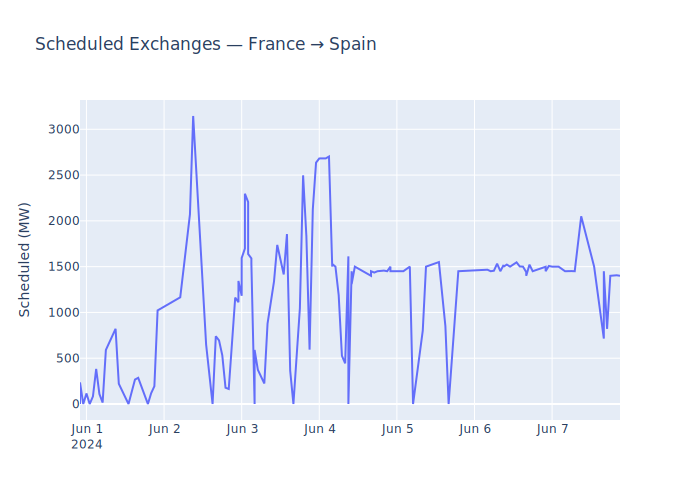

In [5]:
df_sched = client.transmission.scheduled_exchanges(
    start, end, country_from="FR", country_to="ES"
)

fig = px.line(
    df_sched, x="timestamp", y="value",
    title="Scheduled Exchanges — France → Spain",
    labels={"value": "Scheduled (MW)", "timestamp": ""},
)
fig.show()

## 4. Multi-Border Comparison from France

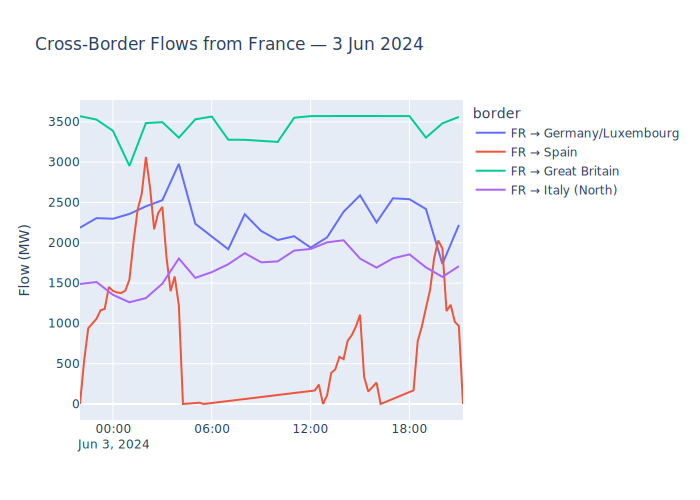

In [6]:
start = "2024-06-03"
end = "2024-06-04"

borders = ["DE_LU", "ES", "GB", "IT_NORTH"]
frames = []
for code in borders:
    df = client.transmission.crossborder_flows(
        start, end, country_from="FR", country_to=code
    )
    df["border"] = f"FR → {country_name(code)}"
    frames.append(df)

df_borders = pd.concat(frames, ignore_index=True)

fig = px.line(
    df_borders, x="timestamp", y="value", color="border",
    title="Cross-Border Flows from France — 3 Jun 2024",
    labels={"value": "Flow (MW)", "timestamp": ""},
)
fig.show()

## 5. Net Transfer Capacity — France → Spain

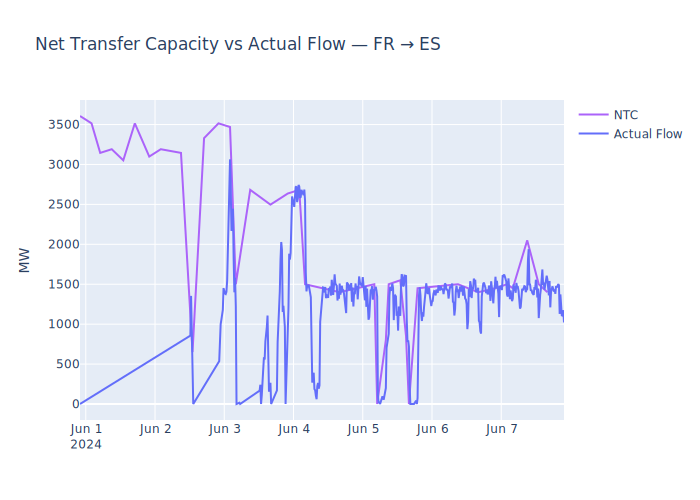

In [7]:
start = "2024-06-01"
end = "2024-06-08"

df_ntc = client.transmission.net_transfer_capacity(
    start, end, country_from="FR", country_to="ES"
)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_ntc["timestamp"], y=df_ntc["value"],
    name="NTC", line=dict(color="#AB63FA"),
))
df_fr_es = client.transmission.crossborder_flows(
    start, end, country_from="FR", country_to="ES"
)
fig.add_trace(go.Scatter(
    x=df_fr_es["timestamp"], y=df_fr_es["value"],
    name="Actual Flow", line=dict(color="#636EFA"),
))
fig.update_layout(
    title="Net Transfer Capacity vs Actual Flow — FR → ES",
    yaxis_title="MW",
    xaxis_title="",
)
fig.show()